<a href="https://colab.research.google.com/github/anologicon/analise-de-Investimento/blob/master/dataSprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup the note-book

---



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
%matplotlib inline
sns.set();
sns.color_palette("Blues_d");

In [0]:
#@title

# Config to display a plot on google colab, this is sad by tha way :c

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

# Reading data and preparing to use

---



In [0]:
# The path to the file;

file_path = '/content/drive/My Drive/Colab Notebooks/DataScprints/realties.json'

In [0]:
# Reading the json file with the var file_path
# Note: Put this analysis in the databricks plataform, to use spark

dataFrame = pd.read_json(file_path)

In [0]:
# Look that estructure

dataFrame.head()

,_id,_index,_score,_source,_type
2,LOr6iGcB_HRRL6pG3mnW,realties,1,"{'error': [], 'uf': 'PR', 'longitude': -49.278...",imovel
3,Ler6iGcB_HRRL6pG3mnb,realties,1,"{'error': [], 'uf': 'PR', 'longitude': -49.280...",imovel
7,5er7iGcB_HRRL6pG1Wn-,realties,1,"{'quarto': 3, 'error': [], 'uf': 'PR', 'longit...",imovel
8,5ur7iGcB_HRRL6pG1mkB,realties,1,"{'quarto': 4, 'error': [], 'uf': 'PR', 'longit...",imovel
9,3Or7iGcB_HRRL6pGxGl1,realties,1,{'anunciante': {'id': '411cbb1b8d58afa3b9419a1...,imovel


In [0]:
# Let use shape;

(lines, columns) = dataFrame.shape

print(' This data frame have ', lines, ' lines and ', columns, ' columns')

 This data frame have  149968  lines and  5  columns


In [0]:
# Ok, now, we need take a focus on the _source column
# But why? The _source column have many types of structures
# with x numbers of columns, and with others types of data like lists;

# The _source, it's a json. Many bots it's used to collect this data, and
# merged in kind of data lake.

# But, you know the json_normalize function from pandas?
# This function can get some structures, preserve the attributes
# fill miss attributes with nan, and return a kind of dataframe.
# On the doc say 'Normalize semi-structured JSON data into a flat table.'

sourceDf = json_normalize(dataFrame._source)

In [0]:
# A copy from the original dataframe, it's a good practice

df = sourceDf.copy()

In [0]:
# Checking for a duplicate data, the urls it's a kind of a unique identification
# because it's one URL for ONE Adsense

duplicated = df[df.duplicated(['url'])]

In [0]:
(rows, _) = duplicated.shape

print('Detected ', rows, ' duplicated lines')

Detected  121  duplicated lines


In [0]:
# Removing duplicates from dataframe

df.drop_duplicates(['url'], inplace=True)

In [0]:
countRemoved = sourceDf.shape[0] - df.shape[0]

print("Was removed", countRemoved, " adsense duplicated!")

Was removed 121  adsense duplicated!


In [0]:
# the column 'valor' is the price of the property
# i assume this my target var, so i started filter the nan values from 'valor'

nanValorDf = df[df['valor'].isna()]

print('The dataframe have', nanValorDf.shape[0], ' nan price')

# My firts idea is, try fix this with the mean, but i decide remove than
# it's low the number of adsense with nan on 'valor'.

The dataframe have 1450  nan price


In [0]:
# Removing NaN adesense on column 'valor'

df.dropna(axis=0, subset=['valor'], inplace=True)

# Starting EDA
--- 

In [0]:
# The column UF (state) have only one value
df['uf'].describe()

count     148397
unique         1
top           PR
freq      148397
Name: uf, dtype: object

In [0]:
# The column 'cidade.full_name' was created from the function 'cidade.full_name';
# This column have onlye one value to!
# So, this dataframe it's fora especific city, Curitiba, Paraná

df['cidade.full_name'].describe()

count                       148397
unique                           1
top       Curitiba, Paraná, Brasil
freq                        148397
Name: cidade.full_name, dtype: object

In [0]:
# The name of neighborhood's.
# This dataframe have 107 neighborhood's

df['bairro.nome'].describe()

count     147275
unique       107
top       Centro
freq       12061
Name: bairro.nome, dtype: object

In [0]:
print('Number of adsense without neighborhood name: ', df['bairro.nome'].isna().sum())

Number of adsense without neighborhood name:  1122


In [0]:
# Separate NaN neighborhood

neighborhoodDf = df.dropna(axis=0, subset=['bairro.nome'])

# Top 10 most valuable neighborhood
### In the first place 'Industrial 1' with mean price more than R$ 800,000,000

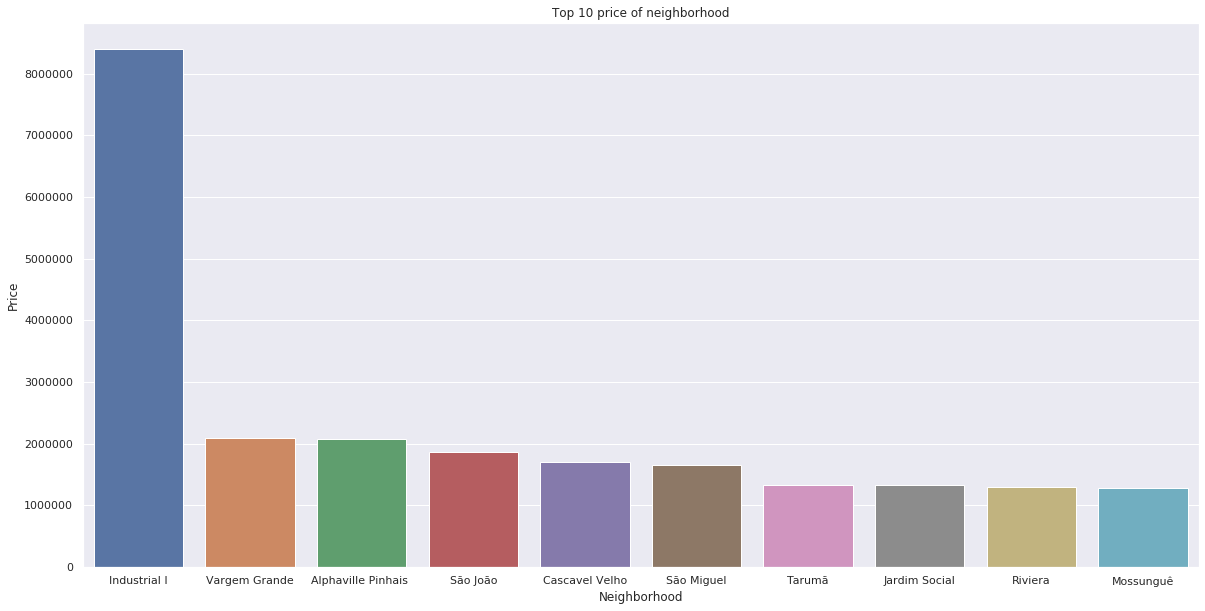

In [0]:
# Sorting adesense prices
gpNeighborhoodDf = gpNeighborhoodDf.sort_values('valor', ascending=False);

# Get only the top 10
gpNeighborhoodDf = gpNeighborhoodDf.iloc[:10]

plt.figure(figsize=(20,10))

# Seting title to graph
plt.title('Top 10 price of neighborhood')

# Preparing the bar plot
sns.barplot(
    x = gpNeighborhoodDf.index,
    y = gpNeighborhoodDf.valor
);

plt.ylabel('Price');
plt.xlabel('Neighborhood');